# Lunares: Benignos vs. Malignos

En este problema hay solo dos clases: lunares malignos y benignos. El ejemplo presenta una red CNN simple de pocas capas (llamada "Reduced Model") y otra red más compleja (llamada "Large Model"). El entrenamiento de la primera es más rápido que la segunda, sin embargo el desempeño (accuracy) es más alto que la primera.

Interesante en este ejemplo es que los conjuntos de datos de training, validation y testing están pre-definidos y no se escogen de manera aleatoria. Cada uno de estos tres conjuntos se encuentra en una carpeta específica. Esta información es definida con la función `ImageLoader`.

Referencia: [CNN Model With PyTorch For Image Classification](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48), by Pranjal Soni (Medium)

In [ ]:
!wget https://www.dropbox.com/s/7ep5nzgd8i47hi3/exp0.zip?dl=0
!unzip -qq exp0.zip

--2021-05-31 15:19:53--  https://www.dropbox.com/s/opotsbuy0j47omm/exp0.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/opotsbuy0j47omm/exp0.zip [following]
--2021-05-31 15:19:54--  https://www.dropbox.com/s/raw/opotsbuy0j47omm/exp0.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3378284ba3f84d9d5360d0da2f.dl.dropboxusercontent.com/cd/0/inline/BPjF0yv0TPgSr3l05VSLDmLsoXIoxoXrBrHOzCQLIPmgj63cvpb2NnrCt-U6QbWTh4Bs0tzIIJOM3oQ8eoupLBkGo71nlVzPuJ5wdHA4-DBqh4Ji1Akit7ReRVe3cb-gqJLuPqvzEu43uEulhzelKF5M/file# [following]
--2021-05-31 15:19:54--  https://uc3378284ba3f84d9d5360d0da2f.dl.dropboxusercontent.com/cd/0/inline/BPjF0yv0TPgSr3l05VSLDmLsoXIoxoXrBrHOzCQLIPmgj63cvpb2NnrCt-U6QbWTh4Bs0tzIIJOM3oQ8eoupLBkGo71nlVzPuJ5

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train, validation and test data directory

train_dir = "train/"
val_dir   = "val/"
test_dir  = "test/"

train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['class_0', 'class_1']


In [ ]:
!wget https://www.dropbox.com/s/caz30t81td7zxgl/cnn_utils.py?dl=0
from cnn_utils import *
print('cnn_utils module has been loaded')

--2021-05-31 15:21:39--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2021-05-31 15:21:39--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3954f3f3e2fee5d81c41ccef36.dl.dropboxusercontent.com/cd/0/inline/BPjHzmp2RT8vhNMZicgThB1qB1vLhnRXNMrG2QyWO1MKxCk0g1S-4Hp5lZmLq1SJjKLHCEm9hanHBEsqF-r8qbu_54yoqeOLe5HlDX3Edut17YwbKd3dmMOBH5k7e-b5wt37Qz_CNJ5Akk1A54Xv_yXc/file# [following]
--2021-05-31 15:21:39--  https://uc3954f3f3e2fee5d81c41ccef36.dl.dropboxusercontent.com/cd/0/inline/BPjHzmp2RT8vhNMZicgThB1qB1vLhnRXNMrG2QyWO1MKxCk0g1S-4Hp5lZmLq1SJjKLHCEm9hanHBEsqF-r8qbu

Image: 15, Label : class_0


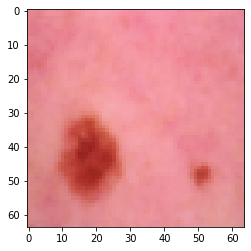

In [ ]:
#display an image in the training dataset
display_img(train_set,15)

In [ ]:
#load the train and validation into batches.

batch_size = 50 

print(f"Length of Train Data      : {len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")

train_dl = DataLoader(train_set, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_set  , batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 2700
Length of Validation Data : 300


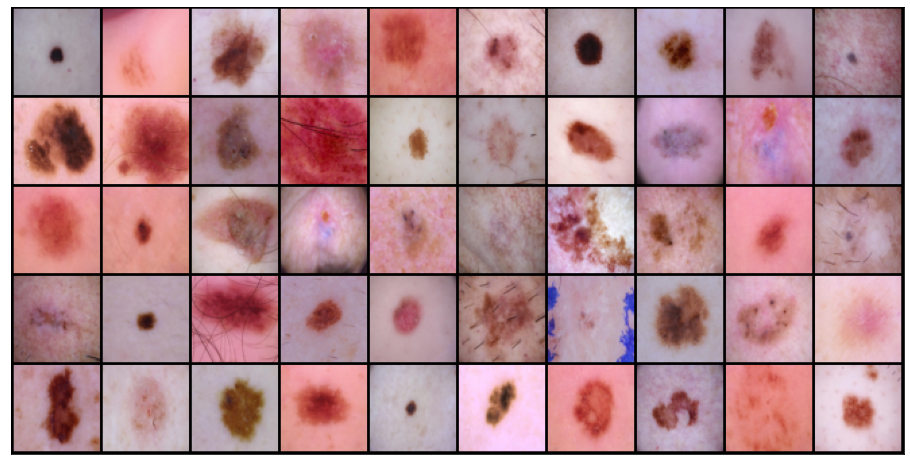

In [ ]:
show_batch(train_dl,nrow=10)

# Escoger uno de los siguientes modelos

En este caso:

* El "reduced model" es más simple, esto implica que el entrenamiento es rápido pero su desempeño no es tan bueno.

* El "large model" es más complejo, esto implica que el entrenamiento es más lento y su desempeño es mejor que el anterior.





In [ ]:
# Reduced Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,2),
            nn.Dropout(0.25)
        )
    
    def forward(self, xb):
        return self.network(xb)


In [ ]:
# Large Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(16384,128), #1024
            nn.ReLU(),
            nn.Linear(128, 64), #512
            nn.ReLU(),
            nn.Linear(64,2) #6
        )
    
    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2048, out_features=1024, bias=True)
    (12): Linear(in_features=1024, out_features=128, bias=True)
    (13): Linear(in_features=128, out_features=2, bias=True)
    (14): Dropout(p=0.25, inplace=False)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 100
opt_func   = torch.optim.Adam
lr         = 0.001
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6708      0.5772      0.6767    ***       9.2 
    1      0.6445      0.6615      0.6867    ***       9.3 
    2      0.6284      0.6018      0.6367              9.0 
    3      0.5934      0.6103      0.6633              9.0 
    4      0.5977      0.5887      0.6767              9.0 
    5      0.5665      0.5637      0.6900    ***       9.1 
    6      0.5519      0.5504      0.6900              9.1 
    7      0.5448      0.5587      0.6967    ***       9.4 
    8      0.5425      0.5541      0.7000    ***       9.3 
    9      0.5353      0.6068      0.6467              9.2 
   10      0.5422      0.5524      0.6467              9.2 
   11      0.5142      0.6039      0.6900              9.0 
   12      0.5284      0.5569      0.7133    ***       9.3 
   13      0.5379      0.5505      0.6933              9.4 
   14      0.5318      0.5252 

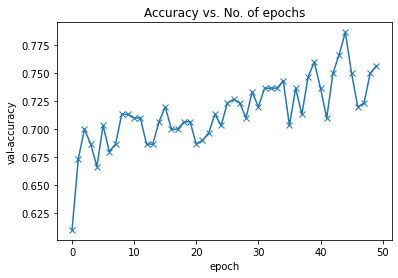

In [ ]:
plot_accuracies(history)

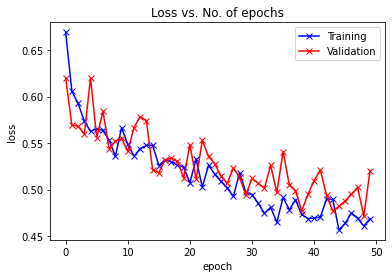

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred) 
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.77
 
Confusion Matrix = 
[[208  92]
 [ 46 254]]


In [ ]:
C1,acc1 = performance(model,train_set,'Training')
C2,acc2 = performance(model,val_set,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[ 966  384]
 [ 162 1188]]
 
Training Accuracy = 0.7978
 
Validation Confusion Matrix = 
[[104  46]
 [ 18 132]]
 
Validation Accuracy = 0.7867
 
Testing Confusion Matrix = 
[[208  92]
 [ 46 254]]
 
Testing Accuracy = 0.7700
 
